# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

# Apprentissage par arbres de décision

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1 - Données

<div class="alert alert-block alert-warning">
Pour illustrer le fonctionnement de l'algorithme de construction et d'utilisation d'arbres de décision, nous allons utiliser un jeu de données très simple contenu dans <code>base2D.csv</code>. Il correspond à des points dans un espace à 2 dimensions ("X1" et "X2") auxquels est associé un "Label" +1 ou -1, ce label correspond à la classe du point.
</div>
    
<div class="alert alert-block alert-info">
Q1.1 - Charger ce jeu de données dans la variable <code>base2D</code> et visualiser ses premières lignes.
</div>

In [2]:
base2D = pd.read_csv("base-2D.csv")

<div class="alert alert-block alert-info">
Q1.2 - Isoler dans un tableau <code>numpy</code> que vous nommerez <code>base2D_class</code> la classe de chaque point et dans un autre tableau <code>base2D_data</code> les coordonnées des points. N'oubliez pas d'utiliser la fonction <code>to_numpy()</code> qui permet de convertir une dataframe en tableau numpy.
</div>

In [6]:
base2D_class = np.array(base2D["Label"])
base2D_data = np.array(base2D[["X1" , "X2"]])
base2D_class
# Important: base2D_class doit contenir des entiers et pas des listes d'entiers:
# ici, pour nous : base2D_class doit être égal à 
# ----> array([-1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1])
# sinon, on a des soucis pour l'affichage...

array([-1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1])

## 2 - Algorithme de construction d'arbres de décision : préliminaires

    
<div class="alert alert-block alert-warning">Certaines fonctions écrites pour le TME sur les $k$ plus proches voisins vont aussi être utile dans ce TME. Si vous les avez déjà écrites, faites un copier/coller pour les ajouter dans ce notebook.
</div>

<div class="alert alert-block alert-info">

Q2.1 - Ecrire la fonction <code>classe_majoritaire</code> qui, étant donné un array de labels rend la classe majoritaire (celle qui est possédée par le plus grand nombre d'exemples donc...). En cas d'égalité, cette fonction rend la première classe rencontrée.
<\div>

In [77]:
from operator import itemgetter

def classe_majoritaire(labels):
    return max(zip(*np.unique(labels, return_counts=True)), key = itemgetter(1))[0]

In [8]:
#Vérification sur nos données:
classe_majoritaire(base2D_class)

-1

### Entropie et gain d'information

    
<div class="alert alert-block alert-success">
    
Pour construire un arbre de décision, il est nécessaire d'avoir une mesure pour calculer le **gain d'information** apporté par l'utilisation d'un attribut pour prédire une valeur de la classe (c'est à dire, le gain apporté par la connaissance d'une valeur de l'attribut pour arriver à prédire la valeur de la classe). En cours, la mesure qui a été présentée est l'**indice de Gini** qui a été introduite pour l'approche <a target="NEW" href="https://fr.wikipedia.org/wiki/Algorithme_CART">CART</a> de construction d'arbres de classification proposé par Breiman, Friedman, Olshen et Stone en 1984.
    
    
Dans ce TME, nous allons utiliser une mesure différente qui est une **mesure d'information**: l'**entropie** de <a target="NEW" href="https://fr.wikipedia.org/wiki/Claude_Shannon">Shannon</a>. Cette mesure a été introduite pour la construction d'arbres de décision dans l'approche <a target="NEW" href="https://fr.wikipedia.org/wiki/Algorithme_ID3">ID3</a> proposée Quinlan dès 1983, mais elle était déjà utilisée depuis les années 60 dans le domaine de la théorie de l'information pour la construction de questionnaires arborescents. 
</div>    

<div class="alert alert-block alert-warning">
    
On note $\{c_1, c_2,..., c_k\}$, l'ensemble des valeurs de classes possibles dans un ensemble $Y$.

On note $p_1$ la probabilité de la classe $c_1$ parmi $Y$, etc., et on note $P=(p_1, p_2,..., p_k)$ la distribution de probabilités sur les classes.

L'**entropie de Shannon** de la distribution $P$ est donnée par:

$ H_S(P) = -\sum_{i=1}^{k} p_i \log_k(p_i)$

Le logarithme utilisé est le logarithme en base $k$ afin d'obtenir une valeur comprise entre $0$ et $1$ de l'entropie. 

<\div>

<div class="alert alert-block alert-warning">
Remarque: pour nous, en Python, une *distribution de probabilités* est représentée par une **liste** $P=[p_1,...,p_k]$ de valeurs réelles telle que
* pour tout $i=1,..., k$ : $0 \leq p_i \leq 1$
* $\sum_{i=1}^{k}p_i = 1$
</div>

<div class="alert alert-block alert-info">
Q2.2 - Ecrire la fonction <code>shannon</code> qui, étant donné une distribution de probabilités $P$ fournie sous la forme d'une liste de nombres, rend la valeur de $H_S(P)$, l'entropie de Shannon de $P$.
</div>

In [53]:
def shannon(P):
    if len(P) == 1:
        return 0
    k = len(P)
    P = [*filter(None, P)]
    return -(P @ np.log(P)) / np.log(k)

In [54]:
# Exemples d'utilisation:
print("H([1]) = ", shannon([1]))
print("H([1,0]) = ", shannon([1, 0]))
print("H([0.25, 0.25, 0.25, 0.25]) = ", shannon([0.25, 0.25, 0.25, 0.25]))
print("H([0.7, 0.1, 0.2, 0.0]) = ", shannon([0.7, 0.1, 0.2, 0.0]))
print("H([1.0/3, 2.0/3]) = ", shannon([1.0/3, 2.0/3]))

H([1]) =  0
H([1,0]) =  -0.0
H([0.25, 0.25, 0.25, 0.25]) =  1.0
H([0.7, 0.1, 0.2, 0.0]) =  0.578389824724
H([1.0/3, 2.0/3]) =  0.918295834054


<div class="alert alert-block alert-info">
    
Q2.3 - Tracer, à l'aide de la fonction <code>plot</code>, la courbe donnant la valeur de <code>shannon([p, 1-p])</code> en fonction de <code>p</code>.</div>

In [55]:
# Pour plot, on a besoin de la librairie suivante:
import matplotlib.pyplot as plt

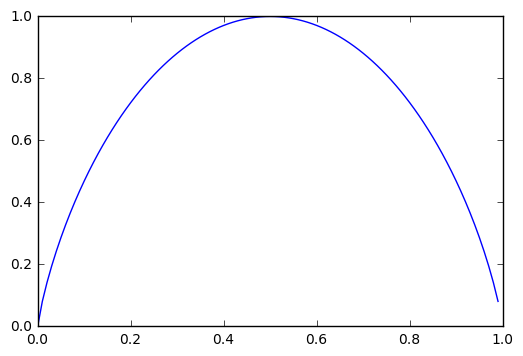

In [56]:
ps = np.arange(0, 1, 0.01)
_ = plt.plot(ps, [shannon([p , 1-p]) for p in ps])

Résultat attendu : 

<img src='Shannon.png' width=300px>


<div class="alert alert-block alert-info">

Q2.4 - A l'aide de la fonction <code>shannon</code>, écrire la fonction <code>entropie</code> qui prend un ensemble de labels (un array numpy) en argument et renvoie l'entropie de la distribution des classes dans cet ensemble.
</div>    

In [57]:
def entropie(labels):
    return shannon(np.unique(labels , return_counts = True)[1]/len(labels))

In [58]:
# Exemple sur nos données :
entropie(base2D_class)

1.0

### Discrétisation des attributs numériques

<div class="alert alert-block alert-success">
    
**Discrétiser** un attribut numérique consiste en trouver un seuil de coupure dans son ensemble de valeurs après les avoir ordonnées. 

    Par exemple, soit l'attribut Age contenant les valeurs 12, 15, 17, 20, 35, 37, 40. On discrétise cet attribut en 2 intervalles en prenant un seuil, par exemple, la valeur 30: cela permet de séparer d'un côté les valeurs inférieures ou égales à 30, et de l'autre les valeurs strictement supérieures à 30.

En apprentissage, lors que l'on doit discrétiser un attribut numérique, on utilise la distribution des classes sur cet ensemble de valeurs: le seuil de discrétisation est choisi afin d'optimiser la distribution des classes des exemples qui se trouvent de chaque côté du seuil. 
    
    Par exemple, toujours avec l'attribut Age donné plus haut, soit la distribution suivante des classes +1 et -1:
    -1, -1, -1, +1, +1, +1, +1
    qui correspond à : la valeur d'âge 17 est associée à la classe -1, la valeur 18 est associée à la classe -1, etc.
</div>    

<div class="alert alert-block alert-warning">
Considérons la base d'apprentissage suivante qui donne pour une valeur d'âge d'une personne, la classe +1 si la personne peut voter, ou la classe -1 si elle ne peut pas voter:

<table>
<tr>    
    <th>Age:</th><td>12</td><td>15</td><td>17</td><td>20</td><td>35</td><td>37</td><td>40</td>
</tr>
<tr>    
    <th>peut voter:</th><td>-1</td><td>-1</td><td>-1</td><td>+1</td><td>+1</td><td>+1</td><td>+1</td>
</tr>    
</table>    

Lors de la construction d'un arbre de décision, on souhaite discrétiser l'attribut Age en utilisant la distribution des classes: on veut un seuil de coupure dans l'ensemble des valeurs d'âges qui soit le plus en adéquation avec la classe.

Pour les valeurs dans notre table, on peut dire que prendre un seuil de coupure qui soit une valeur d'âge comprise entre 17 et 20 est intéressant. Par exemple, si on choisit comme seuil la valeur 18.5 on obtient 2 intervalles:
- les âges inférieurs ou égaux à 18.5 qui sont associés à la classe -1
- les âges strictement supérieurs à18.5 qui sont associés à la classe +1

On dit que le seuil 18.5 permet d'obtenir une discrétisation optimale pour la classe.
</div>

<div class="alert alert-block alert-success">

Mais tous les problèmes de discrétisation ne sont pas si simple, il est parfois difficile de voir un seuil de discrétisation optimal.    
    
Pour faire cela de façon automatique, on utile une mesure comme l'entropie de Shannon et on applique l'algorithme de discrétisation suivant:
- on choisit un seuil dans l'ensemble des valeurs numériques: ce seuil sépare les classes en 2 sous-ensembles, celui des classes des valeurs inférieures ou égales au seuil, et celui des classes des valeurs strictement supérieures au seuil. Cela fournit donc un distribution des classes sur ces 2 ensembles.
- on calcule le désordre des classes associées aux exemples de chaque côté du seuil et on agrège les 2 valeurs de désordre obtenues pour déterminer la qualité de la coupure.


Soit $X$ un ensemble d'exemples, et soit $A$ un attribut que l'on souhaite discrétiser. Pour cela, on constitue l'ensemble des valeurs prises par les exemples de $X$ pour l'attribut $A$. Soit $A_X$ cet ensemble de valeurs.

La discrétisation de $A_X$ s'effectue par les étapes suivantes:
- Etape 1: ordonner de façon croissante les valeurs de $A_X$;
- Etape 2: regarder tous les seuils possibles de coupure entre 2 valeurs consécutives de $A_X$ (on prend comme seuil de coupure la valeur médiane entre ces 2 valeurs). Chaque seuil trouvé crée 2 intervalles qui générent 2 sous-ensembles de $X$: l'ensemble $X_1$ des exemples dont la valeur pour $A$ et inférieure ou égale au seuil, et l'ensemble $X_2$ des exemples dont la valeur pour $A$ et supérieure au seuil. On détermine la qualité du seuil par la mesure présentée ci-dessous et on note $Q(seuil)$ sa valeur.

La meilleure coupure pour discrétiser $A_X$ est celle qui minimise la valeur $Q(seuil)$.

La mesure $Q(seuil)$ se calcule de la façon suivante:
- on calcule l'entropie de Shannon $H_S(X_1)$ de la distribution des classes dans $X_1$
- on calcule l'entropie de Shannon $H_S(X_2)$ de la distribution des classes dans $X_2$
- la valeur de $Q(seuil)$ est alors:
$Q(seuil)= \frac{|X_1|}{|X_1|+|X_2|}H_S(X_1) + \frac{|X_2|}{|X_1|+|X_2|}H_S(X_2)$
où |.| désigne le cardinal de l'ensemble considéré (ie. son nombre de valeurs).
</div>

<div class="alert alert-block alert-warning">
Par exemple, soit $X=\{17, 18, 20, 27, 35, 37, 40\}$, chaque valeur étant associées aux classes +1, +1, -1, -1, +1, +1, -1 respectivement. Un seuil de coupure possible est $31$ ($31 = \frac{27+35}{2}$). Ce seuil coupe $X$ en $X_1=\{17, 18, 20, 27\}$ et $X_2=\{35, 37, 40\}$.

- pour $X_1$, la probabilité de chaque classe est: $p(+1)= 0.5$ et $p(-1)=0.5$ donc, $H_S(X_1)=1$;
- pour $X_2$, la probabilité de chaque classe est: $p(+1)= \frac{2}{3}$ et $p(-1)=\frac{1}{3}$ donc, $H_S(X_2)=0.9182958340544896$;
- on a donc: $$Q(seuil=31) = \frac{4}{7} H_S(X_1) + \frac{3}{7} H_S(X_2);$$
soit $Q(seuil=31) = 0.9182958340544896$
</div>


<div class="alert alert-block alert-warning">

Ci-dessous, la méthode <code>discretise</code> qui permet de trouver le seuil de coupure optimal dans un ensemble de valeurs associées à des classes (labels).
    
</div>

In [59]:
def discretise(m_desc, m_class, num_col):
    """ input:
            - m_desc : (np.array) matrice des descriptions toutes numériques
            - m_class : (np.array) matrice des classes (correspondant à m_desc)
            - num_col : (int) numéro de colonne de m_desc à considérer
        output: 
            - un tuple (seuil_trouve, entropie) qui donne le seuil trouvé et l'entropie associée
            - (None , +Inf) si on ne peut pas discrétiser (moins de 2 valeurs d'attribut)
    """
    # Liste triée des valeurs différentes présentes dans m_desc:
    l_valeurs = np.unique(m_desc[:,num_col])
    
    # Si on a moins de 2 valeurs, pas la peine de discrétiser:
    if (len(l_valeurs) < 2):
        return ((None, float('Inf')), ([],[]))
    
    # Initialisation
    best_seuil = None
    best_entropie = float('Inf')
    
    # pour voir ce qui se passe, on va sauver les entropies trouvées et les points de coupures:
    liste_entropies = []
    liste_coupures = []
    
    nb_exemples = len(m_class)
    
    for v in l_valeurs:
        cl_inf = m_class[m_desc[:,num_col]<=v]
        cl_sup = m_class[m_desc[:,num_col]>v]
        nb_inf = len(cl_inf)
        nb_sup = len(cl_sup)
        
        # calcul de l'entropie de la coupure
        val_entropie_inf = entropie(cl_inf) # entropie de l'ensemble des inf
        val_entropie_sup = entropie(cl_sup) # entropie de l'ensemble des sup
        
        val_entropie = (nb_inf / float(nb_exemples)) * val_entropie_inf \
                       + (nb_sup / float(nb_exemples)) * val_entropie_sup
        
        # Ajout de la valeur trouvée pour retourner l'ensemble des entropies trouvées:
        liste_coupures.append(v)
        liste_entropies.append(val_entropie)
        
        # si cette coupure minimise l'entropie, on mémorise ce seuil et son entropie:
        if (best_entropie > val_entropie):
            best_entropie = val_entropie
            best_seuil = v
    
    return (best_seuil, best_entropie), (liste_coupures,liste_entropies)

In [62]:
# Exemple d'utilisation:
numero_colonne = 0
resultat, liste_vals = discretise(base2D_data,base2D_class,numero_colonne)

print("Seuil de coupure trouvé: ",resultat[0]," et son entropie:", resultat[1])

Seuil de coupure trouvé:  4.0  et son entropie: 0.310608253257


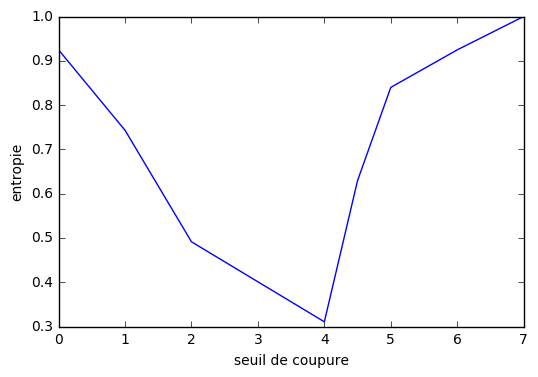

In [63]:
# affichage de la variation de l'entropie en fonction du choix du seuil:
X,Y = liste_vals
plt.plot(X,Y)
plt.ylabel('entropie')
plt.xlabel('seuil de coupure')
plt.show()

<div class="alert alert-block alert-warning">
Une fois un seuil de coupure $s$ trouvé sur un attribut $n$, on partitionne la base d'apprentissage en 2 ensembles:
- l'ensemble des exemples qui ont une valeur inférieure ou égale à $s$ pour l'attribut $n$
- l'ensemble des exemples qui ont une valeur strictement supérieure à $s$ pour l'attribut $n$
</div>    

<div class="alert alert-block alert-info">

Q2.5 - Ecrire la fonction <code>partionne</code> qui prend en argument deux numpy array $m_desc$ et $m_class$ qui représentent une base d'apprentissage, un numéro de colonne $n$ et une valeur de seuil $s$ et qui rend un tuple composé  de 2 tuples de numpy arrays:
- le premier tuple est composé de l'ensemble des descriptions de tous les exemples de $T$ qui ont une valeur pour la colonne $n$ inférieure ou égale à $s$ et l'ensemble de leur classe;
- le second tuple est composé de l'ensemble des descriptions de tous les exemples de $T$ qui ont une valeur pour la colonne $n$ strictement supérieure à $s$ et l'ensemble de leur classe;
</div>

In [71]:
def partitionne(md , mc , n , s):
    s_inf = md[:, n] <= s
    c_inf = mc[s_inf]
    d_inf = md[s_inf]
    
    s_sup = ~s_inf
    c_sup = mc[s_sup]
    d_sup = md[s_sup]
    
    return (d_inf, c_inf), (d_sup, c_sup)
    
print(base2D_data)

[[ 0.   4. ]
 [ 1.   3.5]
 [ 1.   1. ]
 [ 2.   1. ]
 [ 2.   2. ]
 [ 4.   4. ]
 [ 4.   5. ]
 [ 4.   6. ]
 [ 4.5  1. ]
 [ 4.5  6. ]
 [ 5.   1. ]
 [ 5.   5. ]
 [ 6.   2. ]
 [ 7.   4. ]]


In [72]:
# Exemple d'utilisation :
(left_data,left_class), (right_data,right_class) = partitionne(base2D_data, base2D_class, 0, 4)

In [76]:
left_data

array([[ 0. ,  4. ],
       [ 1. ,  3.5],
       [ 1. ,  1. ],
       [ 2. ,  1. ],
       [ 2. ,  2. ],
       [ 4. ,  4. ],
       [ 4. ,  5. ],
       [ 4. ,  6. ]])

## 3 - Construction d'arbres de décision

<div class="alert alert-block alert-success">
    Dans cette partie, on réalise l'implémentation de l'algorithme de construction d'un arbre de décision.
    </div>

### Représentation d'un arbre en Python

<div class="alert alert-block alert-warning">
Pour représenter un arbre en Python, on a besoin de définir une structure de données adéquate. 

Un arbre de décision est défini par des noeuds qui sont de 2 types :
<br>- noeud interne : c'est un noeud qui est associé à une dimension (ie. un attribut de description des exemples) et à une valeur <code>v</code> sur cette dimension, et qui possède des exactement 2 fils qui sont aussi des noeuds. Le fils gauche de ce noeud est utilisé pour les valeurs de la dimension qui sont inférieures ou égales à <code>v</code>, et le fils droit est utilisé pour les valeurs qui sont strictement supérieures à  <code>v</code>. Un noeud interne est représenté par t-uple Python <code>(Dim, Valeur, FilsG, FilsD)</code> contenant 4 éléments:
<ol>
    <li><code>Dim</code> : le numéro de la dimension ;</li>
    <li><code>Valeur</code> : la valeur <code>v</code>;</li>
    <li><code>FilsG</code> : noeud interne à utiliser pour les valeurs de la dimension qui sont inférieures ou égales à <code>v</code>;</li>
    <li><code>FilsD</code> : noeud interne à utiliser pour les valeurs de la dimension qui sont strictement supérieures à <code>v</code>.</li>
</ol>
<p>- feuille : c'est un noeud qui est associé à un <code>label de la classe</code> et qui a la particularité de ne pas avoir de descendants. Il est représenté par une valeur qui correspond à la classe.

</div>

### Construction de l'arbre de décision

<div class="alert alert-block alert-success">
Comme on l'a vu dans le cours, pour construire un arbre de décision à partir d'un dataset ($X$, $Y$), il faut réaliser les étapes suivantes:
<ol>
<li>calculer l'entropie de Shannon de l'ensemble des classes $Y$, on la note $H_S(Y)$.</li>
    
<li>si $H_S(Y)$ est inférieure à epsilon (qui est un réel positif donné en paramètre de l'algorithme), alors construire une feuille avec cet ensemble, la classe associée à cette feuille est la classe majoritaire dans $Y$.</li>
    
<li>sinon, pour chaque attribut $X_j$ qui décrit les exemples de $X$,
    <ol><li>- 3.1. pour chacune des valeurs $v_{jl}$ de $X_j$ construire l'ensemble des exemples de $X$ qui possède la valeur $v_{jl}$ ainsi que l'ensemble de leurs labels.</li>
    <li>- 3.2. calculer l'entropie conditionnelle de Shannon de la classe relativement à l'attribut $X_j$. On note $H_S(Y|X_j)$ cette entropie.</li></ol></li>
    
<li>l'attribut $X_{best}$ qui **maximise le gain d'information** est choisi pour constituer un nouveau noeud $\eta$ de l'arbre de décision:
    <ol><li>- 4.1. chaque valeur de $X_{best}$ est utilisée pour décomposer ($X$, $Y$) en autant de datasets que $X_{best}$ possède de valeurs: chaque dataset est séparant $X$ et $Y$ selon la valeur prise pour $X_{best}$.</li>
    <li>- 4.2. pour chaque dataset obtenu on reprend en 1 pour construire chacun des fils de $\eta$.</li></ol></li>
</ol>

On rappelle que le gain d'information est:

$$I_S(X_j,Y) = H_S(Y) - H_S(Y|X_j)$$

On peut remarquer que chercher l'attribut $X_j$ qui **maximise le gain d'information** $I_S(X_j,Y)$ est équivalent à chercher $X_j$ qui **minimise l'entropie** $H_S(Y|X_j)$ (car le terme $H_S(Y)$ reste constant pour les calculs pour tous les attributs).
    
</div>    

<div class="alert alert-block alert-info">
Q3.1 - Compléter la fonction <code>construit_AD</code> suivante afin qu'elle permette de construire un arbre de décision. Cette fonction rend un noeud interne qui correspond à l'arbre construit pour l'ensemble $(X,Y)$ donné.
    </div>

In [82]:
# ------------------------ VERSION A COMPLETER !

# Compléter ce code là où est indiqué : [A COMPLETER]

def construit_AD(m_desc, m_class, epsilon):
    """ input:
            - m_desc : (np.array) matrice des descriptions toutes numériques
            - m_class : (np.array) matrice des classes (correspondant à m_desc)
            - epsilon : (float) seuil pour le critère d'arrêt : si l'entropie de la classe est inférieure
              ou égale à epsilon, alors on crée une feuille. En général, epsilon vaut 0.0 mais on peut parfois,
              dans le cas de base d'apprentissage bruitée, utiliser une valeur supérieure à 0.0              
        output: arbre de décision correspondant
    """
    if (len(m_desc) == 0):
        return None
    
    # dimensions de m_desc:
    (nb_lig, nb_col) = m_desc.shape
    
    entropie_class = entropie(m_class)
    
    # Cas d'arrêt
    if (entropie_class <= epsilon) or (nb_lig <=1):
        return classe_majoritaire(m_class)
    
    best_col = -1
    best_gain = float('-Inf')
    best_seuil = None
    for i in range(0, nb_col):
        result_discretisation = discretise(m_desc , m_class , i)
        if type(result_discretisation) == tuple:
            (seuil,entr), _ = result_discretisation
            info_gain = entropie_class - entr        
        else:
            info_gain = best_gain # pour ne rien changer
            
        if info_gain > best_gain:
            best_col = i
            best_gain = info_gain
            best_seuil = seuil

    if best_seuil != None:
        (left_data, left_class), (right_data, right_class) = partitionne(m_desc, m_class, best_col, best_seuil)    
        arbre_gauche = construit_AD(left_data , left_class , epsilon)
        arbre_droit = construit_AD(right_data , right_class , epsilon)
        return (best_col, best_seuil, arbre_gauche, arbre_droit)

    # si on n'a trouvé aucun seuil sur aucun attribut:
    return classe_majoritaire(m_class)


In [83]:
# Exemple d'utilisation :
ad_base2D = construit_AD(base2D_data, base2D_class, 0)
ad_base2D

(0, 4.0, (1, 5.0, -1, 1), 1)

### Affichage d'un arbre de décision

<div class="alert alert-block alert-warning">
Pour afficher un arbre, on doit d'abord le transformer en une chaîne de caractères qui pourra par la suite être affichée avec print.
    
La fonction suivante, <code>arbre_tostring</code> réalise cette transformation.    
</div>    

In [84]:
def arbre_tostring(tree,level=0):
    """ input:
            - tree: tuple représentant un arbre de décision
            - level: (int) niveau du noeud racine de cet arbre
        output: (str) arbre sous la forme d'une chaîne pour affichage            
    """
    res = ""
    
    prefixe = "\n" + "|\t"*level
    
    if type(tree) == tuple:
        num_col, v_seuil, tree_left, tree_right = tree
        res += prefixe + "Col. "+str(num_col) + " <= " + str(v_seuil)
        res += arbre_tostring(tree_left,level+1)
        res += prefixe + "Col. "+str(num_col) + " > " + str(v_seuil)
        res += arbre_tostring(tree_right,level+1)
    else:
        res += " : classe " +str(tree)
    return res

In [85]:
#Exemple d'utilisation :
arbre_tostring(ad_base2D)

print(arbre_tostring(ad_base2D))


Col. 0 <= 4.0
|	Col. 1 <= 5.0 : classe -1
|	Col. 1 > 5.0 : classe 1
Col. 0 > 4.0 : classe 1


<div class="alert alert-block alert-info">


Q3.2 - Tracer sur une feuille de papier les frontières de séparation des classes qui correspondent à l'arbre ainsi affiché. 
    
</div>    

### Classification d'exemples avec un arbre de décision

<div class="alert alert-block alert-warning">
    La classification avec un arbre de décision est très simple. Soit $T$ un arbre, et soit $e$ la description d'un exemple dont on veut prédire la classe avec $T$:
    
- si $T$ est une feuille, alors la classe de $e$ est celle qui se trouve dans la feuille 
- si $T$ n'est pas une feuille, il est constitué: d'un numéro de colonne à tester $nc$, d'une valeur de seuil $s$, d'un sous-arbre gauche $Tg$ et d'un sous-arbre droit $Td$. La classe de $e$ est obtenue en classifant $e$ avec $Tg$ si la colonne $nc$ de description de $e$ est inférieure ou égale au seuil $s$, ou alors en classificant $e$ avec $Td$ si elle est strictement supérieure ) $s$.
</div>

<div class="alert alert-block alert-info">


Q3.3 - Ecrire la fonction <code>arbre_classifie</code> qui prend un arbre de décision et la description d'un exemple et rend la classe trouvée pour cet exemple.
    
</div>    

In [90]:
def arbre_classifie(arbre , desc):
    if not isinstance(arbre, tuple):
        return arbre
    
    col, seuil, g, d = arbre
    if desc[col] > seuil:
        return arbre_classifie(d, desc)
    return arbre_classifie(g, desc)

In [91]:
# Exemple d'utilisation :
arbre_classifie(ad_base2D, base2D_data[4,:])

-1

## 4 - Utilisation sur des données réelles 

<div class="alert alert-block alert-info">


Q4.1 - Expérimenter l'algorithme de construction d'arbres de décision sur les données des Iris (cf. TME sur les $k$ plus proches voisins).
<ol>
<li>charger les données des Iris.</li>
<li>construire un arbre de décision et l'afficher.</li>
<li>découper aléatoirement la base des Iris en 2 sous-bases ayant exactement la même répartition des classes.</li>
<li>écrire une fonction <code>arbre_taux</code> qui prend en argument un arbre de décision $T$ construit préalablement, un ensemble de description $D$ et l'ensemble des classes $C$ qui lui correspond. Cette fonction classifie chaque exemple de $D$ avec $T$ et compare la classe obtenue avec la classe donnée dans $C$. En retour, la fonction rend le taux d'erreur de prédiction réalisé sur l'ensemble $D$.</li>
</ol>
</div>  

In [99]:
iris = pd.read_csv('data-iris.csv')
iris_data  = np.array(iris[["sepallength", "sepalwidth", "petallength", "petalwidth"]])
iris_class = np.array(iris["class"])

In [100]:
# Exemple d'utilisation :
ad_iris = construit_AD(iris_data, iris_class, 0)
print(arbre_tostring(ad_iris))


Col. 3 <= 0.5 : classe Iris-setosa
Col. 3 > 0.5
|	Col. 3 <= 1.7
|	|	Col. 2 <= 4.9
|	|	|	Col. 0 <= 5.0
|	|	|	|	Col. 1 <= 2.4 : classe Iris-versicolor
|	|	|	|	Col. 1 > 2.4
|	|	|	|	|	Col. 0 <= 4.9 : classe Iris-virginica
|	|	|	|	|	Col. 0 > 4.9 : classe Iris-setosa
|	|	|	Col. 0 > 5.0 : classe Iris-versicolor
|	|	Col. 2 > 4.9
|	|	|	Col. 3 <= 1.5 : classe Iris-virginica
|	|	|	Col. 3 > 1.5
|	|	|	|	Col. 0 <= 6.7 : classe Iris-versicolor
|	|	|	|	Col. 0 > 6.7 : classe Iris-virginica
|	Col. 3 > 1.7
|	|	Col. 2 <= 4.8
|	|	|	Col. 0 <= 5.9 : classe Iris-versicolor
|	|	|	Col. 0 > 5.9 : classe Iris-virginica
|	|	Col. 2 > 4.8 : classe Iris-virginica


In [101]:
# Exemple d'utilisation :
arbre_classifie(ad_iris,iris_data[42,:])

'Iris-setosa'

<div class="alert alert-block alert-info">


Q4.2 - Comparer les performances de l'algorithme de classification par arbres de décision et de l'algorithme des $k$ plus proches voisins sur les données des Iris après avoir l'ensemble des données en 2 sous-ensembles: un ensemble d'apprentissage (pour construire le modèle) et un ensemble de test (pour évaluer le taux d'erreur du modèle appris).
</div>  

In [157]:
def classifie_kppv(k , m_desc , m_class , x):
    dist = [v @ v for v in m_desc - x]
    kppv = np.argsort(dist)[:k]
    return classe_majoritaire(np.array(m_class)[kppv])

In [158]:
from random import sample

def datasets(iris_data, iris_class):
    test = sample(range(len(iris_data)), int(0.2 * len(iris_data)))

    test_data  = iris_data [test]
    test_class = iris_class[test]

    test = set(test)
    train = [i for i in range(len(iris_data)) if i not in test]

    train_data  = iris_data [train]
    train_class = iris_class[train]
    
    return (train_data, train_class), (test_data, test_class)

In [161]:
kppv_err_min = float('Inf')
for k in range(1, len(iris_data), 2):
    kppv_err = sum(classifie_kppv(k, iris_data, iris_class, x) != c for x, c in zip(iris_data, iris_class))
    if kppv_err <= kppv_err_min:
        kppv_err_min = kppv_err
        best_k = k

In [168]:
def validation_croisee(error_func, n):
    return sum(error_func(*datasets(iris_data, iris_class)) for _ in range(n)) / n

In [169]:
def kppv_err(train, test):
    return sum(classifie_kppv(best_k, *train, x) != c for x, c in zip(*test)) / len(test[0])

def cart_err(train, test):
    ad_train = construit_AD(*train, 0)
    return sum(arbre_classifie(ad_train, x) != c for x, c in zip(*test)) / len(test[0])

In [170]:
validation_croisee(kppv_err, 50)

0.048000000000000015

In [171]:
validation_croisee(cart_err, 50)

0.07333333333333336

<div class="alert alert-block alert-info">


Q4.3 - (bonus) Sur le modèle de la fonction <code>shannon</code>, écrire une fonction <code>gini</code> qui calcule l'indice de Gini d'une distribution de probabilités. 
A l'aide de cette fonction, et en apportant les modifications nécessaires, écrire une version de construction d'arbres de décision qui utilise l'indice de Gini au lieu de l'entropie de Shannon.    
</div>  